# DATA SET MINISTERIO DE SALUD (CORONAVIRUS) 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv



directorio='/Users/gonzalosaravia/Desktop/Udemy/COVID-19/Ministerio salud/'

os.chdir('/Users/gonzalosaravia/Desktop/Udemy/COVID-19/Ministerio salud/')
#os.getcwd(directorio)
#os.listdir()

# Junio 2020
#df =pd.read_csv('Covid19Casos.csv', encoding='utf-16' ) 

# Julio 2020
#df =pd.read_csv('Covid19Casosjulio.csv', encoding='utf-16' ) 

#Octubre 2020
df =pd.read_csv('Covid19Casos13_10.csv') 

#df =pd.read_csv('Covid19Casos.csv', header = 0, delimiter = ';') 
df.head()

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,53.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2020-10-13
1,1000002,M,21.0,Años,Argentina,Buenos Aires,La Matanza,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Público,Caso Descartado,Descartado,6,2020-06-01,427,2020-10-13
2,1000003,F,40.0,Años,Argentina,Córdoba,Capital,Córdoba,2020-05-24,2020-06-01,...,NaN,NO,14,Privado,Caso Descartado,Descartado,14,2020-06-01,14,2020-10-13
3,1000005,F,58.0,Años,Argentina,Mendoza,Las Heras,Mendoza,NaN,2020-06-01,...,NaN,NO,50,Público,Caso Descartado,Descartado,50,2020-06-01,49,2020-10-13
4,1000006,M,28.0,Años,Argentina,Buenos Aires,Malvinas Argentinas,Buenos Aires,2020-05-30,2020-06-01,...,NaN,NO,6,Público,Caso sospechoso - Con muestra sin resultado co...,Sospechoso,6,NaN,515,2020-10-13


In [3]:
print('Cantidad de Filas y columnas:',df.shape)

Cantidad de Filas y columnas: (2293566, 25)


In [4]:
print('Nombre columnas:',df.columns)

Nombre columnas: Index(['id_evento_caso', 'sexo', 'edad', 'edad_años_meses',
       'residencia_pais_nombre', 'residencia_provincia_nombre',
       'residencia_departamento_nombre', 'carga_provincia_nombre',
       'fecha_inicio_sintomas', 'fecha_apertura', 'sepi_apertura',
       'fecha_internacion', 'cuidado_intensivo', 'fecha_cui_intensivo',
       'fallecido', 'fecha_fallecimiento', 'asistencia_respiratoria_mecanica',
       'carga_provincia_id', 'origen_financiamiento', 'clasificacion',
       'clasificacion_resumen', 'residencia_provincia_id', 'fecha_diagnostico',
       'residencia_departamento_id', 'ultima_actualizacion'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293566 entries, 0 to 2293565
Data columns (total 25 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   id_evento_caso                    int64  
 1   sexo                              object 
 2   edad                              float64
 3   edad_años_meses                   object 
 4   residencia_pais_nombre            object 
 5   residencia_provincia_nombre       object 
 6   residencia_departamento_nombre    object 
 7   carga_provincia_nombre            object 
 8   fecha_inicio_sintomas             object 
 9   fecha_apertura                    object 
 10  sepi_apertura                     int64  
 11  fecha_internacion                 object 
 12  cuidado_intensivo                 object 
 13  fecha_cui_intensivo               object 
 14  fallecido                         object 
 15  fecha_fallecimiento               object 
 16  asistencia_respiratoria_mecanica  ob

In [11]:
# Borro las columnas que no me interesan
df.drop(['residencia_pais_nombre', 'residencia_provincia_nombre', 'residencia_departamento_nombre'], axis=1)

,id_evento_caso,sexo,edad,edad_años_meses,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,sepi_apertura,fecha_internacion,cuidado_intensivo,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,53.0,Años,Buenos Aires,NaN,2020-06-01,23,NaN,NO,...,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2020-10-13
1,1000002,M,21.0,Años,Buenos Aires,NaN,2020-06-01,23,NaN,NO,...,NaN,NO,6,Público,Caso Descartado,Descartado,6,2020-06-01,427,2020-10-13
2,1000003,F,40.0,Años,Córdoba,2020-05-24,2020-06-01,23,NaN,NO,...,NaN,NO,14,Privado,Caso Descartado,Descartado,14,2020-06-01,14,2020-10-13
3,1000005,F,58.0,Años,Mendoza,NaN,2020-06-01,23,NaN,NO,...,NaN,NO,50,Público,Caso Descartado,Descartado,50,2020-06-01,49,2020-10-13
4,1000006,M,28.0,Años,Buenos Aires,2020-05-30,2020-06-01,23,NaN,NO,...,NaN,NO,6,Público,Caso sospechoso - Con muestra sin resultado co...,Sospechoso,6,NaN,515,2020-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293561,999994,M,39.0,Años,Tierra del Fuego,NaN,2020-06-01,23,NaN,NO,...,NaN,NO,94,Público,Caso Descartado,Descartado,94,2020-06-01,7,2020-10-13
2293562,999995,M,33.0,Años,Formosa,NaN,2020-06-01,23,NaN,NO,...,NaN,NO,34,Público,Caso confirmado por laboratorio - No Activo po...,Confirmado,34,2020-06-12,49,2020-10-13
2293563,999996,M,42.0,Años,CABA,NaN,2020-06-01,23,NaN,NO,...,NaN,NO,2,Privado,Caso Descartado,Descartado,2,2020-06-01,0,2020-10-13
2293564,999997,F,30.0,Años,Córdoba,NaN,2020-06-01,23,NaN,NO,...,NaN,NO,14,Público,Caso Descartado,Descartado,2,2020-06-02,0,2020-10-13


# Clasificación por sexo total testeos

In [6]:
# Clasificacion por sexo
df["sexo"].unique()

array(['M', 'F', 'NR'], dtype=object)

In [7]:
df['sexo'].count()

2293566

In [8]:
df['sexo'].value_counts(normalize=True) * 100

F     50.762655
M     48.903236
NR     0.334109
Name: sexo, dtype: float64

In [9]:
# Cantidad de testeos en mujeres
casos_mujeres = df.loc[:, 'sexo'] == 'F'
df_casos_mujeres = df.loc[casos_mujeres]
df_casos_mujeres['sexo'].count()

1164275

In [10]:
# Cantidad de testeos en Hombres
casos_Hombres = df.loc[:, 'sexo'] == 'M'
df_casos_Hombres = df.loc[casos_Hombres]
df_casos_Hombres['sexo'].count()

1121628

In [11]:
# Cantidad de testeos en NR
casos_nr = df.loc[:, 'sexo'] == 'NR'
df_casos_nr = df.loc[casos_nr]
df_casos_nr['sexo'].count()

7663

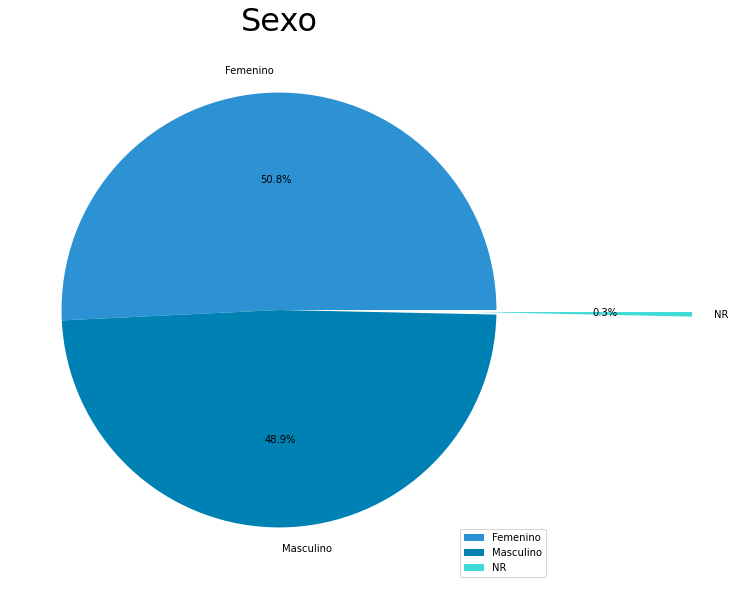

In [12]:
# Pie chart porcentaje segun sexo de testeos
plt.figure(figsize = (10,10))

labels = ['Femenino', 'Masculino', 'NR']
#values = [df_casos_mujeres['sexo'].value_counts(), df_casos_Hombres['sexo'].value_counts(),
#         df_casos_nr['sexo'].value_counts()]
values = df['sexo'].value_counts()

# Separo el pedazo de la torta que quiero
explode = [0, 0, 0.9]
colores = ['#2C92D4', '#0081B4', '#3EDAD8']

#plt.axis("equal")
plt.pie(values, labels= labels, autopct='%1.1f%%', explode = explode, colors= colores)
plt.legend(loc='lower right')
plt.title('Sexo', fontsize = 32)
plt.show()


In [13]:
df["edad"].unique()

array([5.300e+01, 2.100e+01, 4.000e+01, 5.800e+01, 2.800e+01, 2.600e+01,
       6.900e+01, 7.300e+01, 7.000e+00, 4.200e+01, 4.600e+01, 4.300e+01,
       6.000e+01, 2.900e+01, 3.700e+01, 4.100e+01, 7.100e+01, 2.300e+01,
       2.500e+01, 6.100e+01, 2.200e+01, 3.300e+01, 5.400e+01, 4.400e+01,
       2.000e+00, 3.800e+01, 7.500e+01, 5.500e+01, 5.200e+01, 3.400e+01,
       3.000e+00, 1.000e+00, 8.300e+01, 3.100e+01, 3.900e+01, 4.800e+01,
       4.900e+01,       nan, 7.000e+01, 9.000e+00, 5.000e+01, 5.700e+01,
       4.700e+01, 3.500e+01, 2.000e+01, 9.300e+01, 6.400e+01, 5.900e+01,
       7.700e+01, 4.500e+01, 6.200e+01, 5.600e+01, 3.000e+01, 3.600e+01,
       4.000e+00, 7.600e+01, 1.400e+01, 5.000e+00, 6.500e+01, 8.100e+01,
       8.200e+01, 8.700e+01, 8.600e+01, 3.200e+01, 8.000e+01, 6.600e+01,
       1.100e+01, 1.500e+01, 9.000e+01, 9.700e+01, 5.100e+01, 8.000e+00,
       2.700e+01, 6.800e+01, 2.400e+01, 9.200e+01, 6.000e+00, 1.000e+01,
       9.600e+01, 8.400e+01, 7.200e+01, 1.700e+01, 

In [14]:
df["edad"].describe()

count    360050.000000
mean         39.733581
std          21.342814
min           0.000000
25%          26.000000
50%          37.000000
75%          52.000000
max         120.000000
Name: edad, dtype: float64

# Clasificacion de casos totales confirmados por provincia

In [15]:
df["carga_provincia_nombre"].unique()

array(['Buenos Aires', 'CABA', 'Mendoza', 'Santa Cruz',
       'Tierra del Fuego', 'San Juan', 'Córdoba', 'Corrientes',
       'Santa Fe', 'Salta', 'Misiones', 'Formosa', 'Entre Ríos',
       'La Rioja', 'Río Negro', 'Chaco', 'San Luis', 'Tucumán', 'Neuquén',
       'La Pampa', 'Catamarca', 'Chubut', 'Santiago del Estero', 'Jujuy'],
      dtype=object)

In [16]:
df["clasificacion_resumen"].unique()

array(['Descartado', 'Sospechoso', 'Confirmado', 'Sin Clasificar'],
      dtype=object)

In [17]:
# Confirmados totales por provincia
Confirmadostotales = df[df.clasificacion_resumen.str.contains('Confirmado|carga_provincia_nombre')]

Text(0, 0.5, 'Provincias')

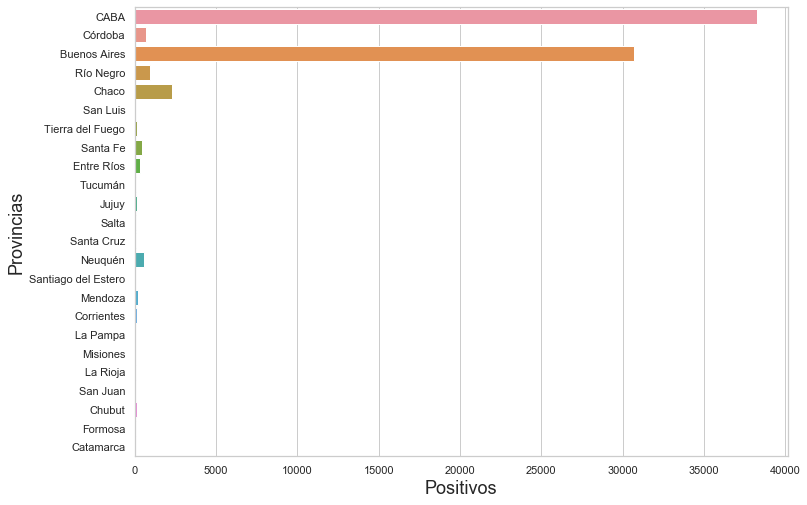

In [18]:
labels = ['Buenos Aires', 'CABA', 'Mendoza', 'Santa Cruz',
       'Tierra del Fuego', 'San Juan', 'Córdoba', 'Corrientes',
       'Santa Fe', 'Salta', 'Misiones', 'Formosa', 'Entre Ríos',
       'La Rioja', 'Río Negro', 'Chaco', 'San Luis', 'Tucumán', 'Neuquén',
       'La Pampa', 'Catamarca', 'Chubut', 'Santiago del Estero', 'Jujuy']

sns.set(style="whitegrid",rc={'figure.figsize':(11.7,8.27)}, color_codes=True)
# Grafico de barras
sns.countplot(y=Confirmadostotales['carga_provincia_nombre'])
plt.xlabel("Positivos", fontsize= 18)
plt.ylabel("Provincias", fontsize= 18)

# Porcentajes
#print(Confirmadostotales['provincia_carga'].value_counts(normalize=True) * 100)

In [158]:
#df['fecha_diagnostico'].unique()

In [157]:
#np.array(Confirmadostotales['clasificacion_resumen'])

# Casos confirmados por fecha

In [19]:
# Hago un groupby por fechas segun los confirmados
df_comfirmados_fecha = Confirmadostotales.groupby(['fecha_diagnostico']).size().reset_index(name= 'Confirmados_por_fechas')
df_comfirmados_fecha

,fecha_diagnostico,Confirmados_por_fechas
0,2020-03-03,1
1,2020-03-06,6
2,2020-03-07,1
3,2020-03-08,2
4,2020-03-09,6
...,...,...
117,2020-06-30,2608
118,2020-07-01,2386
119,2020-07-02,2484
120,2020-07-03,2378


In [148]:
# Confirmados totales por provincia
#Confirmadosxfecha = df[df.clasificacion_resumen.str.contains('Confirmado|fecha_diagnostico')]

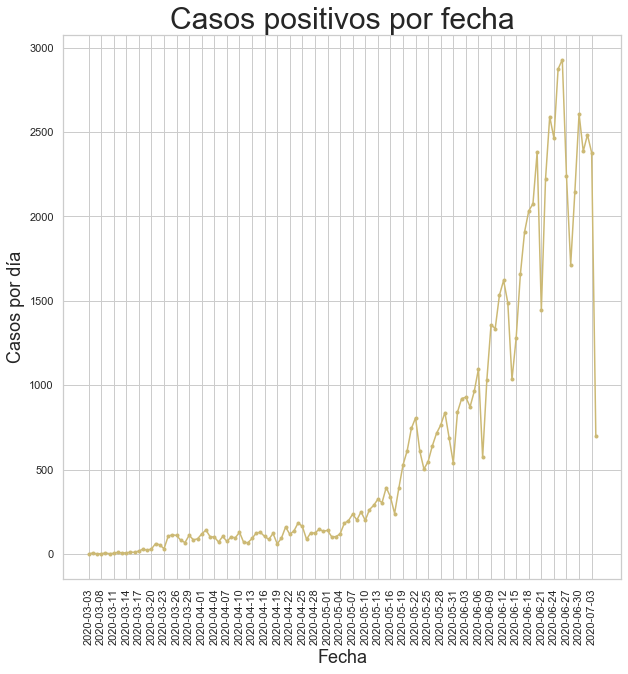

In [20]:
# Linechart positivos por fecha 
import seaborn as sns
plt.figure(figsize = (10,10))

plt.title("Casos positivos por fecha", fontsize= 30)

plt.plot(df_comfirmados_fecha['fecha_diagnostico'], df_comfirmados_fecha['Confirmados_por_fechas'], 'y.-')

#print(Confirmadostotales['fecha_diagnostico'][::3])
plt.xlabel('Fecha', fontsize= 18)
plt.ylabel('Casos por día', fontsize= 18)
plt.xticks(df_comfirmados_fecha['fecha_diagnostico'][::3], rotation= 90)

plt.show()

# Casos descartados por provincia

In [21]:
# Descargados totales por provincia
Descartadostotales = df[df.clasificacion_resumen.str.contains('Descartado|carga_provincia_nombre')]

Text(0, 0.5, 'Provincias')

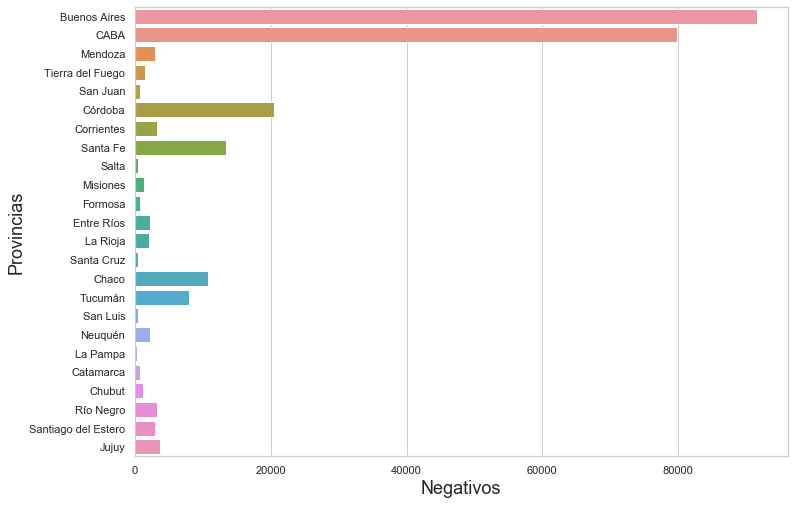

In [22]:
sns.set(style="whitegrid",rc={'figure.figsize':(11.7,8.27)}, color_codes=True)
# Grafico de barras
sns.countplot(y=Descartadostotales['carga_provincia_nombre'])
plt.xlabel("Negativos", fontsize= 18)
plt.ylabel("Provincias", fontsize= 18)
# Porcentajes
#print(Descartadostotales['provincia_carga'].value_counts(normalize=True) * 100)

# Casos descartados por fecha

In [23]:
# Agrupo casos descartados
df_descartados_fecha = Descartadostotales.groupby(['fecha_diagnostico']).size().reset_index(name= 'Descartados_por_fechas')
df_descartados_fecha

,fecha_diagnostico,Descartados_por_fechas
0,2020-02-11,2
1,2020-02-20,2
2,2020-02-27,4
3,2020-02-28,9
4,2020-03-02,5
...,...,...
124,2020-06-30,4477
125,2020-07-01,4520
126,2020-07-02,4173
127,2020-07-03,3758


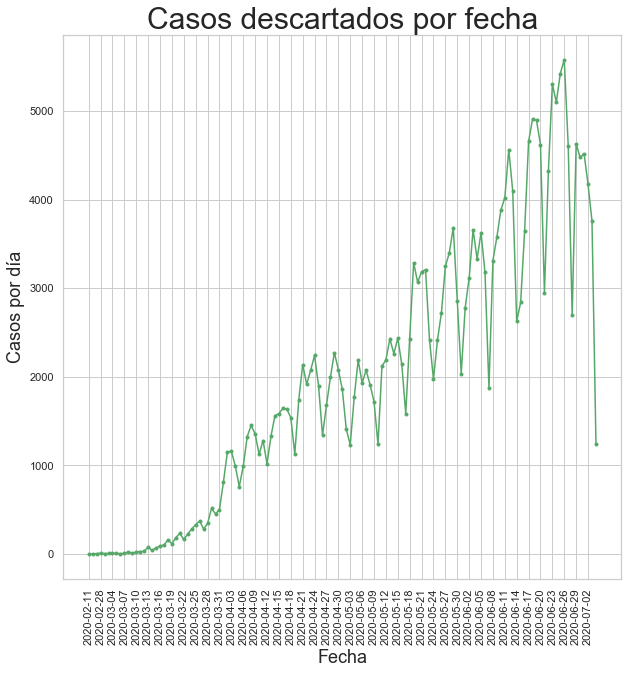

In [24]:
# Grafico testeos descartados
import seaborn as sns
plt.figure(figsize = (10,10))

plt.title("Casos descartados por fecha", fontsize= 30)

plt.plot(df_descartados_fecha['fecha_diagnostico'], df_descartados_fecha['Descartados_por_fechas'], 'g.-')

#print(Confirmadostotales['fecha_diagnostico'][::3])
plt.xlabel('Fecha', fontsize= 18)
plt.ylabel('Casos por día', fontsize= 18)
plt.xticks(df_descartados_fecha['fecha_diagnostico'][::3], rotation= 90)

plt.show()

# Casos positivos vs descartados por fecha

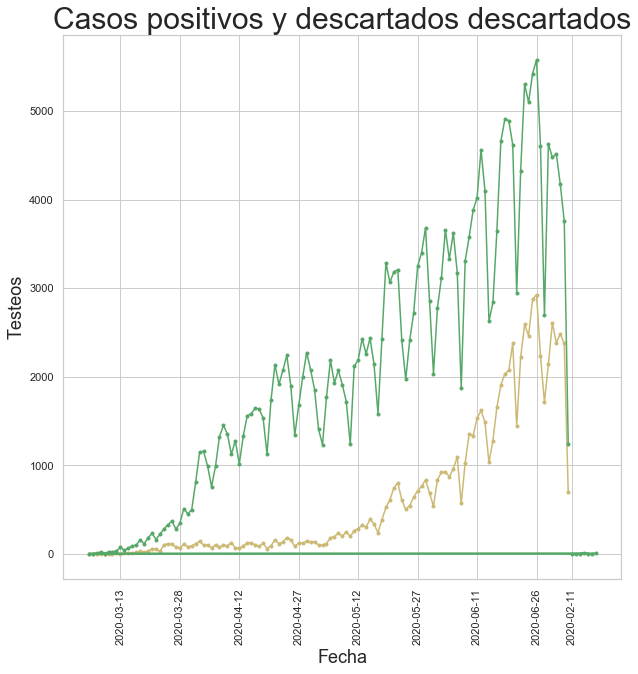

In [26]:
# Grafico de testeos positivos y negativos
import seaborn as sns
plt.figure(figsize = (10,10))

plt.title("Casos positivos y descartados descartados", fontsize= 30)

plt.plot(df_comfirmados_fecha['fecha_diagnostico'], df_comfirmados_fecha['Confirmados_por_fechas'], 'y.-')
plt.plot(df_descartados_fecha['fecha_diagnostico'], df_descartados_fecha['Descartados_por_fechas'], 'g.-')

#print(Confirmadostotales['fecha_diagnostico'][::3])
plt.xlabel('Fecha', fontsize= 18)
plt.ylabel('Testeos', fontsize= 18)
plt.xticks(df_descartados_fecha['fecha_diagnostico'][::15], rotation= 90)

plt.show()


# FALLECIDOS TOTALES POR FECHA

In [27]:
df["fecha_fallecimiento"].unique()

array([nan, '2020-03-07', '2020-03-10', '2020-03-18', '2020-03-13',
       '2020-03-19', '2020-03-24', '2020-03-31', '2020-03-21',
       '2020-03-29', '2020-03-12', '2020-03-14', '2020-03-26',
       '2020-03-15', '2020-03-28', '2020-03-17', '2020-04-15',
       '2020-04-30', '2020-03-16', '2020-04-11', '2020-03-20',
       '2020-04-09', '2020-04-20', '2020-03-25', '2020-03-30',
       '2020-03-27', '2020-03-22', '2020-04-24', '2020-05-13',
       '2020-04-02', '2020-03-23', '2020-06-20', '2020-03-09',
       '2020-04-21', '2020-04-06', '2020-04-01', '2020-04-04',
       '2020-04-10', '2020-04-17', '2020-04-08', '2020-04-14',
       '2020-04-05', '2020-04-03', '2020-04-07', '2020-05-08',
       '2020-04-16', '2020-04-23', '2020-05-09', '2020-04-12',
       '2020-05-05', '2020-04-25', '2020-04-19', '2020-05-07',
       '2020-04-13', '2020-05-21', '2020-04-22', '2020-05-02',
       '2020-05-31', '2020-04-27', '2020-04-18', '2020-05-03',
       '2020-06-03', '2020-05-01', '2020-06-22', '

In [28]:
# Convierto los nan en NO 
df["fecha_fallecimiento"].fillna('NO', inplace=True)
df["fecha_fallecimiento"].unique()

array(['NO', '2020-03-07', '2020-03-10', '2020-03-18', '2020-03-13',
       '2020-03-19', '2020-03-24', '2020-03-31', '2020-03-21',
       '2020-03-29', '2020-03-12', '2020-03-14', '2020-03-26',
       '2020-03-15', '2020-03-28', '2020-03-17', '2020-04-15',
       '2020-04-30', '2020-03-16', '2020-04-11', '2020-03-20',
       '2020-04-09', '2020-04-20', '2020-03-25', '2020-03-30',
       '2020-03-27', '2020-03-22', '2020-04-24', '2020-05-13',
       '2020-04-02', '2020-03-23', '2020-06-20', '2020-03-09',
       '2020-04-21', '2020-04-06', '2020-04-01', '2020-04-04',
       '2020-04-10', '2020-04-17', '2020-04-08', '2020-04-14',
       '2020-04-05', '2020-04-03', '2020-04-07', '2020-05-08',
       '2020-04-16', '2020-04-23', '2020-05-09', '2020-04-12',
       '2020-05-05', '2020-04-25', '2020-04-19', '2020-05-07',
       '2020-04-13', '2020-05-21', '2020-04-22', '2020-05-02',
       '2020-05-31', '2020-04-27', '2020-04-18', '2020-05-03',
       '2020-06-03', '2020-05-01', '2020-06-22', 

In [29]:
# Fallecidos totales dentro del dataset
fallecidos = df["fecha_fallecimiento"] != 'NO'
df_fallecidos = df.loc[fallecidos]
df_fallecidos['fecha_fallecimiento'].count()
#fallecidos.count()

3506

In [30]:
df['fallecido'].unique()

array(['NO', 'SI'], dtype=object)

In [31]:
# Total fallecidos otra forma de sacarlo
Fallecidos = df.loc[:, 'fallecido'] == 'SI'
df_Fallecidos = df.loc[Fallecidos]
df_Fallecidos['fallecido'].count()

3506

In [32]:
# Agrupo casos fallecidos por fecha
df_fallecidos_fecha = df_Fallecidos.groupby(['fecha_fallecimiento']).size().reset_index(name= 'fallecidos_por_fecha')
df_fallecidos_fecha

,fecha_fallecimiento,fallecidos_por_fecha
0,2020-03-07,1
1,2020-03-09,1
2,2020-03-10,1
3,2020-03-12,2
4,2020-03-13,2
...,...,...
113,2020-06-30,52
114,2020-07-01,61
115,2020-07-02,45
116,2020-07-03,39


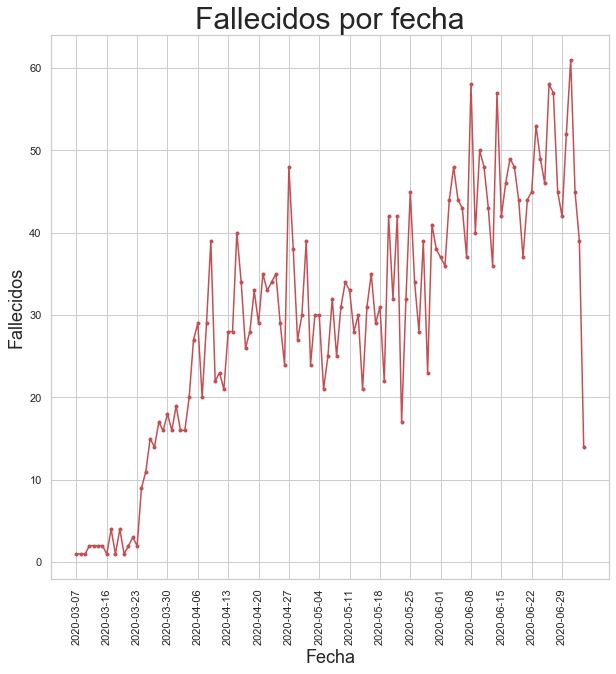

In [33]:
# Line chart Fallecidos por fecha
plt.figure(figsize = (10,10))

plt.title("Fallecidos por fecha", fontsize= 30)

plt.plot(df_fallecidos_fecha['fecha_fallecimiento'], df_fallecidos_fecha['fallecidos_por_fecha'], 'r.-')

#print(Confirmadostotales['fecha_diagnostico'][::3])
plt.xlabel('Fecha', fontsize= 18)
plt.ylabel('Fallecidos', fontsize= 18)
plt.xticks(df_fallecidos_fecha['fecha_fallecimiento'][::7], rotation= 90)

plt.show()

# Fallecidos por sexo sin discriminar si el testeo es positivo o negativo

In [34]:
# Cantidad mujeres fallecidas
casos_mujeres_f = df_Fallecidos.loc[:, 'sexo'] == 'F'
df_casos_mujeres_f = df_Fallecidos.loc[casos_mujeres_f]
df_casos_mujeres_f['sexo'].count()

1500

In [35]:
# Cantidad de hombres fallecidos
casos_hombres_f = df_Fallecidos.loc[:, 'sexo'] == 'M'
df_casos_hombres_f = df_Fallecidos.loc[casos_hombres_f]
df_casos_hombres_f['sexo'].count()

1982

In [36]:
# Cantidad de NR fallecidos
casos_nr_f = df_Fallecidos.loc[:, 'sexo'] == 'NR'
df_casos_nr_f = df_Fallecidos.loc[casos_nr_f]
df_casos_nr_f['sexo'].count()

24

In [37]:
# En porcentajes
df_Fallecidos['sexo'].value_counts(normalize=True) * 100

M     56.531660
F     42.783799
NR     0.684541
Name: sexo, dtype: float64

/Users/gonzalosaravia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  del sys.path[0]


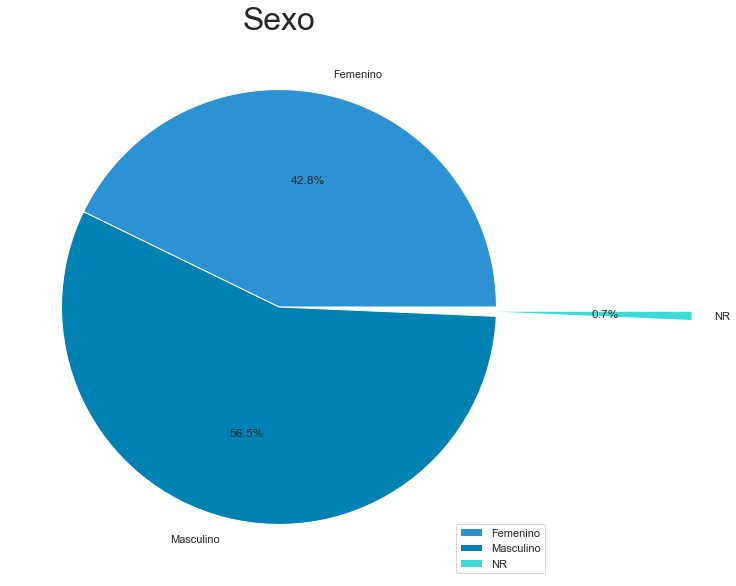

In [38]:
# Pie chart fallecidos por sexo

plt.figure(figsize = (10,10))

labels = ['Femenino', 'Masculino', 'NR']
values = [df_casos_mujeres_f['sexo'].value_counts(), df_casos_hombres_f['sexo'].value_counts(),
          df_casos_nr_f['sexo'].value_counts()]
# Separo el pedazo de la torta que quiero
explode = [0, 0, 0.9]
colores = ['#2C92D4', '#0081B4', '#3EDAD8']

#plt.axis("equal")
plt.pie(values, labels= labels, autopct='%1.1f%%', explode = explode, colors= colores)
plt.legend(loc='lower right')
plt.title('Sexo', fontsize = 32)
plt.show()

In [39]:
# Total de testeos que siguen con vida
Vivos = df.loc[:, 'fallecido'] == 'NO'
df_Vivos = df.loc[Vivos]
df_Vivos['fallecido'].count()

357103

# Meses a años

In [40]:
# Calculo cantidad de personas menores a 1 año dentro del data set
meses = df.loc[:, 'edad_años_meses'] == 'Meses'
df_meses = df.loc[meses]
df_meses['edad_años_meses'].count()

5604

In [41]:
# Valores unicos dentro de edad(meses)
df_meses['edad'].unique()

array([10.,  6.,  9.,  5.,  4.,  8.,  3., 11.,  7.,  2.,  1.,  0.])

In [43]:
# Reemplazo todas las edades que figuran en meses que sean mayores a 1 por 1 año para poder calcular datos relevantes
df['edad'].replace([10.,  6.,  9.,  5.,  4.,  8.,  3., 11.,  7.,  2.,  1.], '1')

0         52
1         46
2         41
3         52
4         34
          ..
360604    46
360605    21
360606     1
360607    27
360608    14
Name: edad, Length: 360609, dtype: object

In [44]:
# Y borro la columna edad_años_meses para que quedo solo en años
df.drop(['edad_años_meses'], axis=1)

,id_evento_caso,sexo,edad,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,sepi_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,CLASIFICACION,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,672064,M,52.0,Argentina,Buenos Aires,Florencio Varela,Buenos Aires,2020-05-29,NaN,44,...,NO,NO,6,Público,Caso Descartado,Descartado,6,2020-06-01,274,2020-07-04
1,717629,F,46.0,Argentina,Buenos Aires,Pergamino,Buenos Aires,2020-01-29,2020-01-31,5,...,NO,NO,6,Público,Caso Descartado,Descartado,6,NaN,623,2020-07-04
2,717926,F,41.0,Argentina,CABA,COMUNA 12,CABA,2020-01-23,2020-01-31,5,...,NO,NO,2,Público,Caso Invalidado Epidemiologicamente,Descartado,2,NaN,12,2020-07-04
3,718029,F,52.0,Argentina,Buenos Aires,La Plata,Buenos Aires,2020-01-29,2020-01-31,5,...,NO,NO,6,Público,Caso Invalidado Epidemiologicamente,Descartado,6,NaN,441,2020-07-04
4,718055,F,34.0,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-01-16,2020-01-31,5,...,NO,NO,2,Privado,Caso Descartado,Descartado,2,2020-02-11,0,2020-07-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360604,1253702,M,46.0,Argentina,Buenos Aires,Pilar,CABA,NaN,2020-07-04,27,...,NO,NO,2,Público,Caso Sospechoso - Sin muestra,Sospechoso,6,NaN,638,2020-07-04
360605,1253703,F,21.0,Argentina,Buenos Aires,Ezeiza,Buenos Aires,NaN,2020-07-04,27,...,NO,NO,6,Público,Caso Sospechoso - Sin muestra,Sospechoso,6,NaN,270,2020-07-04
360606,1253704,M,10.0,Argentina,Buenos Aires,Lanús,CABA,NaN,2020-07-04,27,...,NO,NO,2,Privado,Caso Sospechoso - Sin muestra,Sospechoso,6,NaN,434,2020-07-04
360607,1253705,F,27.0,Argentina,Buenos Aires,San Miguel,CABA,NaN,2020-07-04,27,...,NO,NO,2,Privado,Caso Sospechoso - Sin muestra,Sospechoso,6,NaN,760,2020-07-04


# Fallecidos discriminando por confirmados, descartados, sospechosos y sin clasificar

In [45]:
# Fallecidos positivos 
fallecidos_positivos = df_fallecidos[df_fallecidos.clasificacion_resumen.str.contains('Confirmado|fallecido')]

In [46]:
# Agrupo casos positivos fallecidos
#df_confirmados_fallecidos = fallecidos_positivos.groupby(['fallecido']).size().reset_index(name= 'Confirmados_fallecidos')
#df_confirmados_fallecidos

In [47]:
fallecidos_positivos['fallecido'].value_counts(normalize=True) * 100

SI    100.0
Name: fallecido, dtype: float64

In [48]:
# Cantidad confirmados fallecidos
Conf_fallecido = df_Fallecidos.loc[:, 'clasificacion_resumen'] == 'Confirmado'
df_Conf_fallecido = df_Fallecidos.loc[Conf_fallecido]
df_Conf_fallecido['clasificacion_resumen'].count()

1481

In [49]:
# Cantidad descartados fallecidos
Desc_fallecidos = df_Fallecidos.loc[:, 'clasificacion_resumen'] == 'Descartado'
df_Desc_fallecidos= df_Fallecidos.loc[Desc_fallecidos]
df_Desc_fallecidos['clasificacion_resumen'].count()

1860

In [50]:
# Cantidad sospechosos fallecidos
Sosp_fallecidos = df_Fallecidos.loc[:, 'clasificacion_resumen'] == 'Sospechoso'
df_Sosp_fallecido = df_Fallecidos.loc[Sosp_fallecidos]
df_Sosp_fallecido['clasificacion_resumen'].count()

164

In [51]:
# Cantidad sin clasificar fallecidos
sc_fallecidos = df_Fallecidos.loc[:, 'clasificacion_resumen'] == 'Sin Clasificar'
df_sc_fallecidos = df_Fallecidos.loc[sc_fallecidos]
df_sc_fallecidos['clasificacion_resumen'].count()

1

In [52]:
df_Fallecidos['clasificacion_resumen'].value_counts(normalize=True) * 100

Descartado        53.051911
Confirmado        42.241871
Sospechoso         4.677695
Sin Clasificar     0.028523
Name: clasificacion_resumen, dtype: float64

/Users/gonzalosaravia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  del sys.path[0]


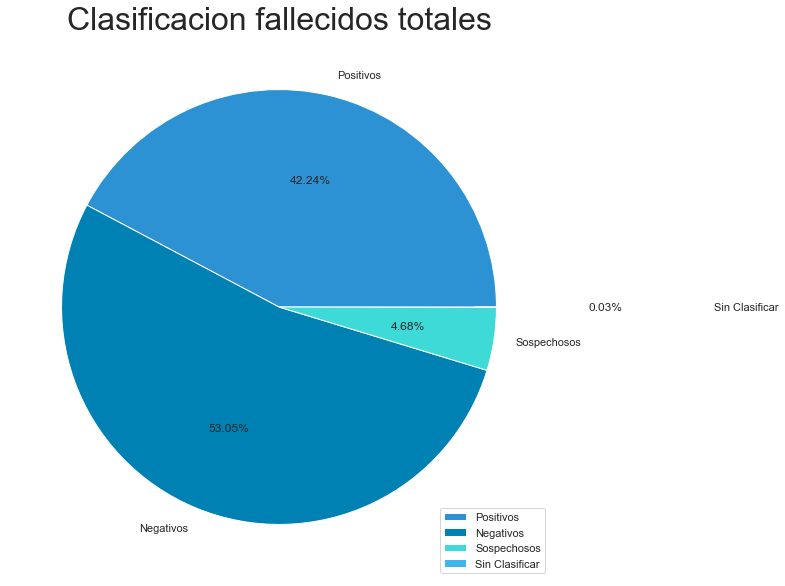

In [53]:
# Pie chart fallecidos por sexo

plt.figure(figsize = (10,10))

labels = ['Positivos', 'Negativos', 'Sospechosos', 'Sin Clasificar']
values = [df_Conf_fallecido['clasificacion_resumen'].value_counts(), df_Desc_fallecidos['clasificacion_resumen'].value_counts(),
          df_Sosp_fallecido['clasificacion_resumen'].value_counts(), df_sc_fallecidos['clasificacion_resumen'].value_counts()]
# Separo el pedazo de la torta que quiero
explode = [0, 0, 0, 0.9]
colores = ['#2C92D4', '#0081B4', '#3EDAD8', '#40B6EC']

#plt.axis("equal")
plt.pie(values, labels= labels, autopct='%1.2f%%', explode = explode, colors= colores)
plt.legend(loc='lower right')
plt.title('Clasificacion fallecidos totales', fontsize = 32)
plt.show()

Text(0, 0.5, 'Fallecidos')

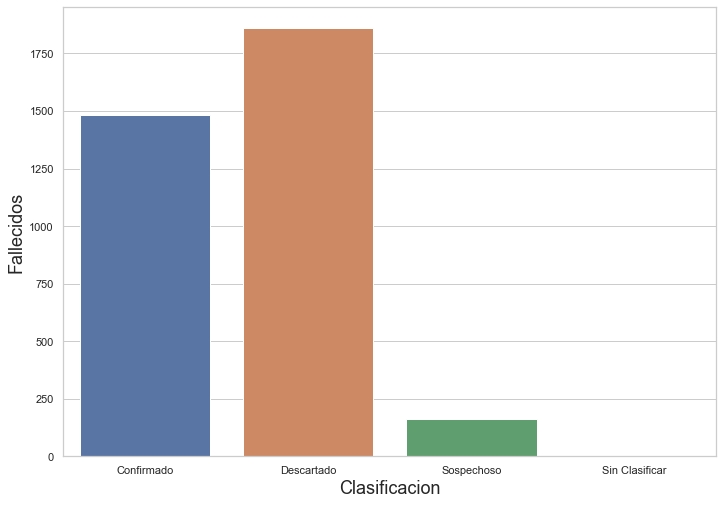

In [54]:
sns.set(style="whitegrid",rc={'figure.figsize':(11.7,8.27)}, color_codes=True)
# Grafico de barras
sns.countplot(x= df_Fallecidos['clasificacion_resumen'])
plt.xlabel("Clasificacion", fontsize= 18)
plt.ylabel("Fallecidos", fontsize= 18)
# Porcentajes

# Por edades segun falleciodos

In [55]:
# Estadisticas fellacidos confirmados
df_Conf_fallecido['edad'].describe()

count    1479.000000
mean       72.421907
std        15.690010
min         1.000000
25%        62.000000
50%        75.000000
75%        84.500000
max       105.000000
Name: edad, dtype: float64

In [56]:
# MODA(valor con mas frequencia)
df_Conf_fallecido['edad'].mode()

0    77.0
1    82.0
dtype: float64

In [57]:
# Cantidad de fallecidos por edad
df_edades_F = df_Fallecidos.groupby(['edad']).size().reset_index(name= 'Edad_fallecidos')
df_edades_F

,edad,Edad_fallecidos
0,0.0,2
1,1.0,10
2,2.0,7
3,3.0,5
4,4.0,5
...,...,...
98,100.0,5
99,101.0,2
100,102.0,1
101,103.0,3


Text(0, 0.5, 'Edad')

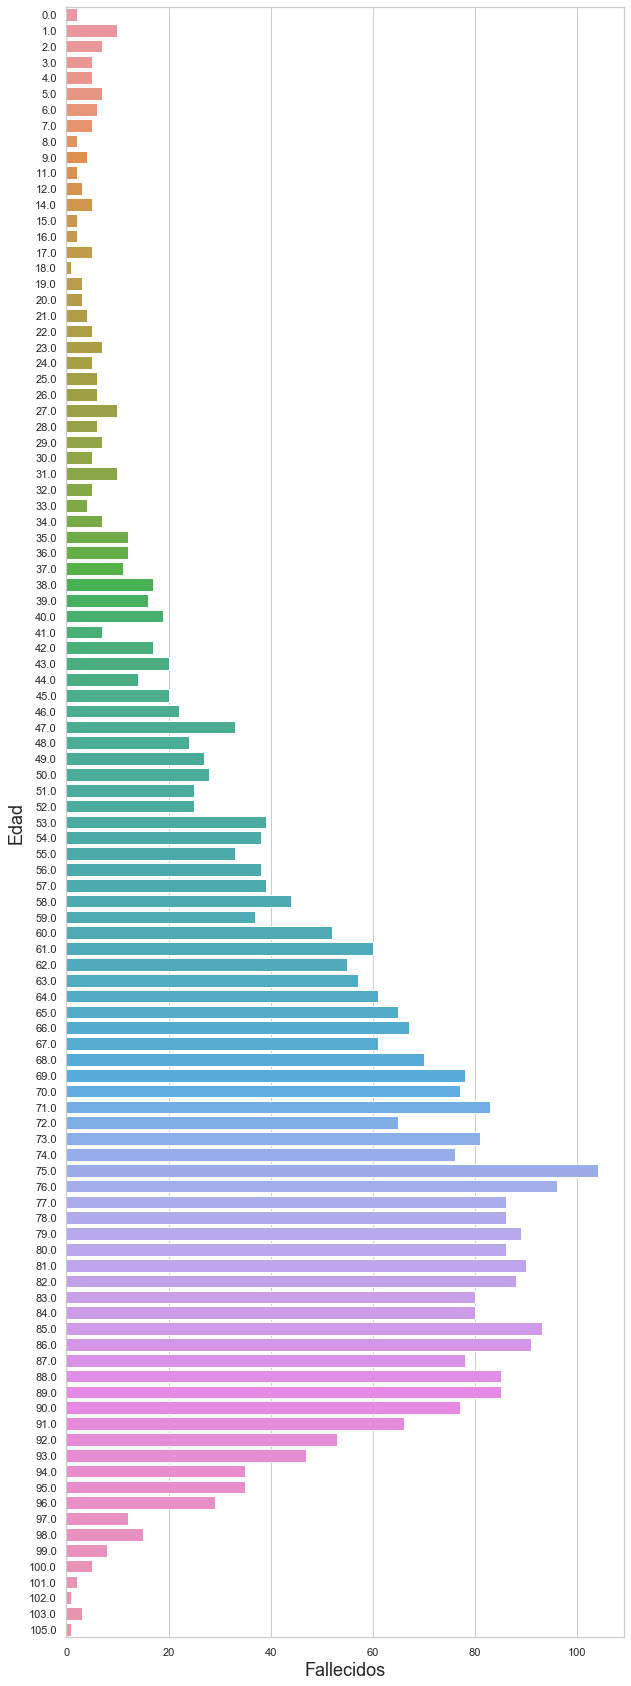

In [58]:
sns.set(style="whitegrid",rc={'figure.figsize':(10,30)}, color_codes=True)
# Grafico de barras
sns.countplot(y= df_fallecidos['edad'])
plt.xlabel("Fallecidos", fontsize= 18)
plt.ylabel("Edad", fontsize= 18)
#plt.xticks(df_Fallecidos['edad'][::7], rotation= 90)
# Porcentajes

In [ ]:
# Pendientes: analisis atencion privada

In [ ]:
# Vinculacion con Geopandas por provincia